In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
# colab-specific file access
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/hw2colab

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/hw2colab'
/content


# Part 1: Guided EDA of bikeshare trips (40%)



In [ ]:
# Reading the .csv into a dataframe:
bike_trips = pd.read_csv('/content/divvy_data.csv', usecols = ["rideable_type", 'started_at', 'ended_at', 'start_station_name', 'start_station_id',
                                                      'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                                                      'member_casual'])


bike_trips['started_at'] = pd.to_datetime(bike_trips['started_at'], format='%Y-%m-%d %H:%M:%S')
bike_trips['ended_at'] = pd.to_datetime(bike_trips['ended_at'], format='%Y-%m-%d %H:%M:%S')


bike_trips.head()
bike_trips.isna().sum()


,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,12671
start_station_id,12671
end_station_name,15635
end_station_id,15635
start_lat,0
start_lng,0
end_lat,317


<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q1.1 (8%):
Explore the `bike_trips` dataframe to answer the following questions.

What is the data granularity?
What time range is represented here? Write code in the cell below to perform your exploration.

In [ ]:
bike_trips.info()
bike_trips.describe()
time_df = bike_trips.select_dtypes(include='datetime64[ns]')
time_df.describe()
integer_df = bike_trips.select_dtypes(include='float64')
integer_df.describe()
# the granuality of dataset -
# started_at and ended_at varies from Jan 01 to Jan 22 of 2021
# there are 3 types of bikes
# station the ride started from 648 in numbrt
# and each rider is either member or casual biker



# [Your Code Ends Here]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146456 entries, 0 to 146455
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       146456 non-null  object        
 1   started_at          146456 non-null  datetime64[ns]
 2   ended_at            146456 non-null  datetime64[ns]
 3   start_station_name  133785 non-null  object        
 4   start_station_id    133785 non-null  object        
 5   end_station_name    130821 non-null  object        
 6   end_station_id      130821 non-null  object        
 7   start_lat           146456 non-null  float64       
 8   start_lng           146456 non-null  float64       
 9   end_lat             146139 non-null  float64       
 10  end_lng             146139 non-null  float64       
 11  member_casual       146456 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 13.4+ MB


,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
count,146456,146456,146456.000000,146456.000000,146139.000000,146139.000000
mean,2021-01-27 00:47:01.462439424,2021-01-27 01:05:23.695847424,41.900030,-87.645500,41.900167,-87.645740
min,2021-01-01 00:02:05,2021-01-01 00:08:39,41.640000,-87.780000,41.540000,-87.810000
25%,2021-01-12 08:23:20,2021-01-12 08:36:16.249999872,41.881032,-87.659753,41.881032,-87.660000
50%,2021-01-22 13:34:59,2021-01-22 13:48:32,41.896373,-87.642715,41.896373,-87.642985
75%,2021-02-09 16:23:49.500000,2021-02-09 16:41:17,41.926651,-87.629452,41.928712,-87.629521
max,2021-02-28 23:59:41,2021-03-05 15:11:45,42.064854,-87.528232,42.070000,-87.510000
std,NaN,NaN,0.046302,0.026778,0.046371,0.026849


In [ ]:
# This plot shows the number of rides against the start date)
rides_per_day = bike_trips.groupby(by=bike_trips['started_at'].dt.date).size().reset_index()
rides_per_day = rides_per_day.rename(columns={0:'count'})

rides_per_day

<Axes: xlabel='started_at'>

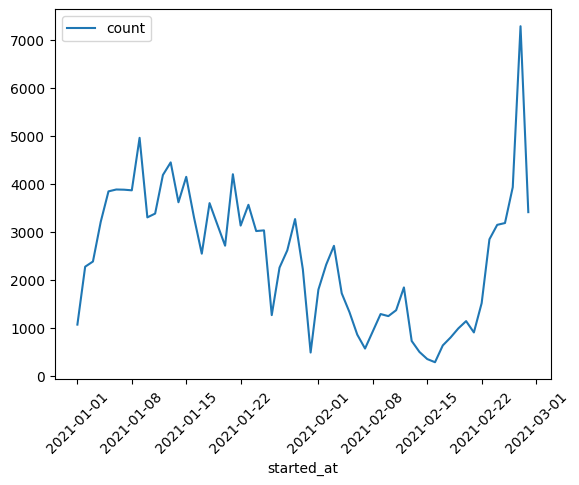

In [ ]:
rides_per_day.plot.line(x='started_at', y='count', rot=45)
# NOTE: `rot=45` is used to rotate our xticks to a specified angle in case they're too wide to fit our plot, like in this case.

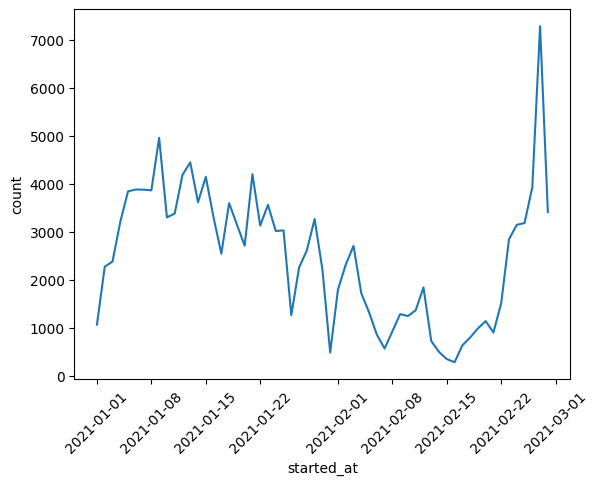

In [ ]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations
axs = sns.lineplot(x="started_at", y="count", data=rides_per_day)
axs.tick_params(axis='x', rotation=45)

Each plotting function in `seaborn` returns a `matplotlib.axes.Axes` object that has methods that we can utilize to customize our plot at the `matplotlib` level. Here, we use `axs.tick_params()` to customize our xticks to be displayed at an angle of 45 degrees, just like we did using the `rot` argument with the `dataframe.plot.line()` function earlier.

<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q1.2 (8%):

Using seaborn's `barplot` function to make a bar chart showing the average
number of rides **started** by `member`s in the:
1. Morning (5:00 AM - 11:59 AM)
2. Afternoon (12:00 PM - 04:59 PM)
3. Evening (5:00 PM - 8:59 PM)
4. Night (9:00 PM - 4:59 AM)


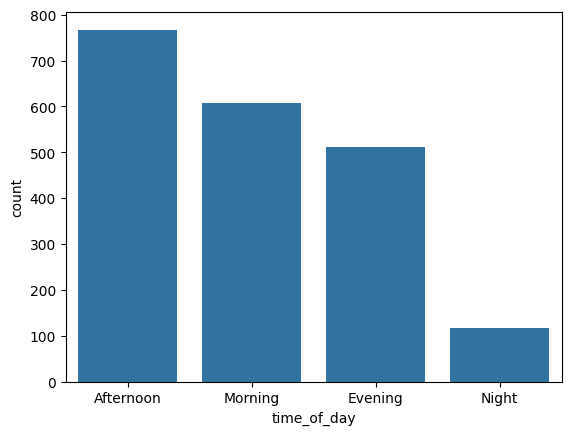

In [ ]:
# [Your Code Starts Here]
def making_category(row):
  hour = row.hour
  if 5 <= hour < 12:
    return 'Morning'
  elif 12 <= hour < 17:
    return 'Afternoon'
  elif 17 <= hour < 21:
    return 'Evening'
  else:
    return 'Night'

bike_trips['time_of_day'] = bike_trips['started_at'].apply(making_category)
trip_time = bike_trips[bike_trips['member_casual'] == 'member'].groupby(by=bike_trips['time_of_day']).size().reset_index()
trip_time = trip_time.rename(columns={0:'count'})
trip_time = trip_time.sort_values(by='count', ascending=False)
unique_days = bike_trips['started_at'].dt.date.nunique()
trip_time['count'] = trip_time['count'] / unique_days
axs = sns.barplot(x="time_of_day", y="count", data=trip_time)
#axs.tick_params(axis='x')
# [Your Code Ends Here]



> The maximum number of members bike around the afternoon (12 PM to 17 PM)


> The number of member riding a bike in morning and evening is approximately equal. Suggesting most people like to bike in between 5 AM to 21 PM


> At night only 1/8 count of people who bike at afternoon will go for ride







<img src="http://today.uic.edu/wp-content/uploads/2014/09/5-bike-lane_orange.png" width="50px" align="left" float="left"/>

<br><br><br>

## Q1.3 (8%):



Visualizalizing the distribution of total number of divvy rides by `member`s on any given day from our `bike_trips` dataframe.



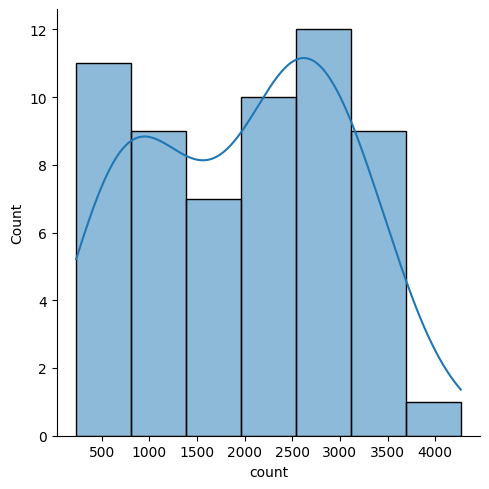

In [ ]:

rides_per_day_member = bike_trips[bike_trips['member_casual'] == 'member'].groupby(by=bike_trips['started_at'].dt.date).size().reset_index()
rides_per_day_member['started_at'] = pd.to_datetime(rides_per_day_member['started_at'])
rides_per_day_member = rides_per_day_member.rename(columns={0:'count'})
axs = sns.displot(x="count", data=rides_per_day_member, kde=True)





Use `seaborn` to make side-by-side boxplots of total `electric_bike`, `classic_bike`, and `docked_bike` rides **started** on any given day in the dataframe.

In [ ]:
rides_per_classic

,started_at,rideable_type,count
0,2021-01-01,classic_bike,618
1,2021-01-01,docked_bike,47
2,2021-01-01,electric_bike,403
3,2021-01-02,classic_bike,1460
4,2021-01-02,docked_bike,112
...,...,...,...
172,2021-02-27,docked_bike,562
173,2021-02-27,electric_bike,1713
174,2021-02-28,classic_bike,2285
175,2021-02-28,docked_bike,172


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

Text(0.5, 0, 'ride type')

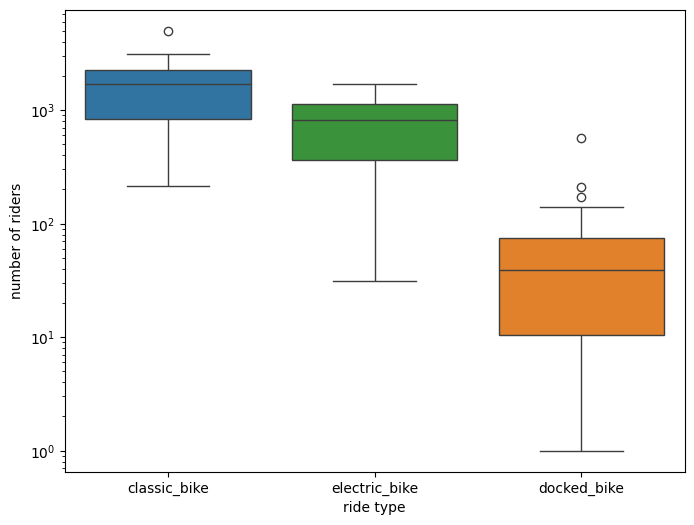

In [ ]:

rides_per_classic = bike_trips.groupby([bike_trips['started_at'].dt.date, 'rideable_type']).size().reset_index(name='count')
rides_per_classic['started_at'] = pd.to_datetime(rides_per_classic['started_at'])
order = ["classic_bike", "electric_bike", "docked_bike"]
plt.figure(figsize=(8,6))
axs = sns.boxplot(x="rideable_type", y="count", data=rides_per_classic, hue='rideable_type', order=order)
plt.yscale('log')
axs.set_ylabel('number of riders')
axs.set_xlabel('ride type')


Let's take a look at the number of `member` vs. `casual` riders and how they relate with weekend or weekday start dates

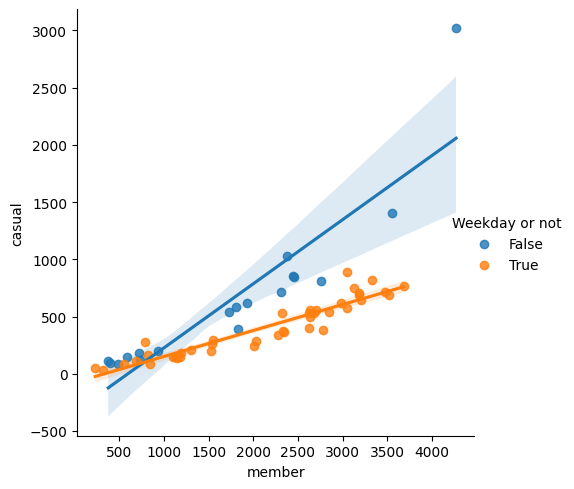

In [ ]:
temp_df = bike_trips[['started_at', 'member_casual']].copy()
temp_df['started_at'] = temp_df['started_at'].dt.date
temp_df = temp_df.rename(columns={'started_at':'start_date'})
temp_df['member'] = temp_df['member_casual'] == 'member'
temp_df['casual'] = temp_df['member_casual'] == 'casual'
temp_df = temp_df.drop(columns='member_casual')
temp_df = temp_df.groupby(['start_date']).sum().reset_index()


temp_df['start_date'] = pd.to_datetime(temp_df['start_date'])
temp_df['is_weekday'] = temp_df['start_date'].dt.day_of_week < 5
ax = sns.lmplot(data=temp_df, x='member', y='casual', hue='is_weekday')
legendObj = ax.legend
legendObj.set_title('Weekday or not')
